## T-SNE ASSIGNMENT | Brain Cancer Dataset

## Introduction of the Dataset

The Brain Cancer Gene Expression - CuMiDa dataset contains gene expression data for 130 brain cancer samples, with 54,677 features representing various gene expression levels. Each sample is labeled with a type indicating the specific brain cancer type. This dataset is designed for analyzing high-dimensional gene expression profiles, making it ideal for dimensionality reduction and clustering tasks using techniques like t-SNE.

- samples: Identifier (object type)
- type: Categorical label (object type)
- Gene expression levels: Numerical values (float64)
- Purpose: Analyze gene expression patterns to identify and visualize clusters or patterns related to different brain cancer types.
- Data Characteristics: High-dimensional with extensive gene expression data, making it suitable for dimensionality reduction techniques like PCA and t-SNE.

## Import Libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the dataset

In [24]:
df = pd.read_csv("C:\Ozy\Data Science\DS datasets\Brain_GSE50161.csv")
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


## Basic Information of dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 54.2+ MB


## Summary of the dataset

In [26]:
df.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,898.500000,12.276393,8.769583,7.722634,9.160209,4.842069,7.968388,6.800111,6.472452,6.068968,...,12.371075,11.812911,13.793913,13.619041,5.206208,4.811666,3.916795,3.701539,4.627912,4.633377
std,37.671829,0.790160,0.673396,1.037339,0.615369,0.922003,0.630260,0.537431,0.659847,0.904152,...,0.609813,0.618190,0.320124,0.309078,0.220767,0.219851,0.165917,0.180251,0.160663,0.192353
min,834.000000,10.156207,6.627878,6.222515,8.044421,3.682762,6.560920,5.910571,5.515079,4.491771,...,9.979005,9.926470,12.719785,12.777792,4.680072,4.247758,3.530287,3.432622,4.278812,4.050006
25%,866.250000,11.679721,8.378760,7.007678,8.595505,4.207043,7.533713,6.389605,5.935051,5.462356,...,12.056825,11.359850,13.605871,13.392790,5.031176,4.684169,3.807447,3.589381,4.530391,4.519694
50%,898.500000,12.502518,8.786242,7.521674,9.194487,4.462729,7.915062,6.654785,6.401447,5.856087,...,12.415320,11.768853,13.774338,13.614493,5.214618,4.785318,3.912025,3.674620,4.607167,4.603287
75%,930.750000,12.883374,9.211098,8.249157,9.707397,5.276685,8.385912,7.143818,6.985782,6.476124,...,12.757924,12.230375,13.969533,13.813191,5.324326,4.950025,4.009166,3.744824,4.718997,4.736634
max,963.000000,13.655639,10.716003,12.054143,10.407136,7.404503,10.164655,8.110006,8.812959,8.646862,...,13.480002,13.022222,14.476079,14.273778,5.904952,5.619512,4.547821,4.854368,5.420217,5.436919


## Checking Missing values in DataFrame

In [27]:
df.isnull().sum()

samples            0
type               0
1007_s_at          0
1053_at            0
117_at             0
                  ..
AFFX-ThrX-5_at     0
AFFX-ThrX-M_at     0
AFFX-TrpnX-3_at    0
AFFX-TrpnX-5_at    0
AFFX-TrpnX-M_at    0
Length: 54677, dtype: int64

## Encode Categorical Variables

In [28]:
# Encode categorical column 'type'
df['type'] = df['type'].astype('category').cat.codes

- Convert the type column to numeric using categorical encoding

## Standardization

In [29]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop(columns=['samples', 'type'])
y = df['type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


- Normalize or standardize the gene expression columns to ensure uniform scaling before applying PCA and t-SNE.

## Dimensionality Reduction with PCA

In [30]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=50)  # Reduce to 50 components as an example
X_pca = pca.fit_transform(X_scaled)

- Apply PCA to reduce the dimensionality of the data before applying t-SNE.

## Splitting the Dataset

In [31]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Display shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (104, 50)
Testing set shape: (26, 50)


- train_test_split: Splits the dataset into training and testing sets. Here, 20% of the data is used for testing, and the remaining 80% is used for training.
- Random State: Ensures that the split is reproducible.

## T-SNE Construction

In [32]:
from sklearn.manifold import TSNE

# Implement t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)

- Perplexity: Controls the balance between local and global aspects of the data. Typically, values between 5 and 50 work well.
- Learning Rate: Controls how much the algorithm adjusts during optimization. A good range is between 10 and 1000.

## Train t-SNE model on the training data

In [33]:
X_tsne = tsne.fit_transform(X_train)
X_tsne

array([[ 3.3597848 ,  2.1585917 ],
       [ 3.673761  ,  2.4422426 ],
       [-4.676242  , -1.3484362 ],
       [-2.9027293 , -6.755629  ],
       [-2.825653  , -5.1032243 ],
       [ 5.3495374 ,  3.4057665 ],
       [-5.6555023 , -3.7971735 ],
       [-3.5039551 , -3.4597518 ],
       [-1.3393592 , -2.8671486 ],
       [ 4.313897  , -0.64503837],
       [ 5.2511525 ,  6.2539177 ],
       [ 0.7366642 ,  3.2150598 ],
       [ 3.1505656 ,  2.5755625 ],
       [ 0.01072129,  3.1852446 ],
       [ 3.058336  ,  6.4208736 ],
       [ 6.4812126 ,  2.9190543 ],
       [ 0.24888016,  6.0459886 ],
       [ 2.7123146 ,  4.532762  ],
       [ 6.5036864 ,  3.6237867 ],
       [-2.5124238 , -1.6418134 ],
       [-3.822251  , -5.346341  ],
       [ 2.9424794 ,  5.872331  ],
       [-1.6396536 , -5.052835  ],
       [-3.3964846 , -4.0968237 ],
       [-2.589982  , -1.551662  ],
       [ 1.3150729 ,  2.4707932 ],
       [ 0.28096554,  5.9311233 ],
       [ 5.355754  ,  2.8626573 ],
       [-4.8843007 ,

## Analyze Cluster Formations

- Cluster Identification: Look for distinct groupings or clusters in the scatter plot. Clusters should ideally represent meaningful groupings based on the underlying data.
- Homogeneity: Check if points within the same cluster are closely packed together, indicating that t-SNE has captured similar data points well.
- Separation: Evaluate how well-separated different clusters are. Well-separated clusters suggest that t-SNE has effectively captured the differences between different categories or classes.

## Visualize the t-SNE results

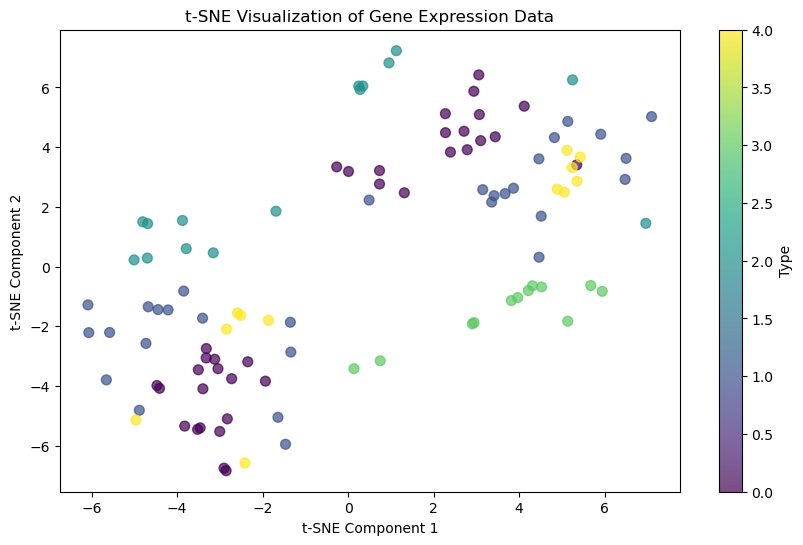

In [34]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Type')
plt.title('t-SNE Visualization of Gene Expression Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

- X_train_tsne[:, 0] and X_train_tsne[:, 1]: These represent the 2D coordinates of the data points after t-SNE transformation.
- c=y_train: Colors the points according to their labels, helping to differentiate clusters or categories.
- cmap='viridis': A colormap to make the plot visually appealing and distinguishable.
- alpha=0.7: Adds slight transparency to better visualize overlapping points.

- fit_transform trains the t-SNE model and reduces the dimensionality of the data to 2D.
- The scatter plot visualizes the t-SNE results, coloring points based on the type column to show clustering patterns.

## Hyperparameter Tuning with Grid Search

In [35]:
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import numpy as np

# Define the parameter grid for t-SNE
param_grid = {
    'perplexity': [5, 10, 30, 50, 100],
    'learning_rate': [10, 50, 100, 200, 500]
}

# Function to evaluate t-SNE with different parameters
def evaluate_clustering(X_train, y_train, perplexity, learning_rate):
    tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate, random_state=42)
    X_tsne = tsne.fit_transform(X_train)
    return silhouette_score(X_tsne, y_train, metric='euclidean')

# Grid search for hyperparameters
best_score = -np.inf
best_params = {}

for perplexity in param_grid['perplexity']:
    for learning_rate in param_grid['learning_rate']:
        score = evaluate_clustering(X_train, y_train, perplexity, learning_rate)
        if score > best_score:
            best_score = score
            best_params = {'perplexity': perplexity, 'learning_rate': learning_rate}

print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score}")

Best Parameters: {'perplexity': 5, 'learning_rate': 200}
Best Silhouette Score: 0.08727651089429855


- evaluate_clustering(X_tsne, number_of_clusters): This function performs KMeans clustering on the t-SNE-transformed data and computes the silhouette score, which measures how well-separated the clusters are.
- Iterate over the defined range of perplexities and learning rates.
- For each combination, apply t-SNE and transform the scaled training data.
- Evaluate the clustering quality using the silhouette score.
- Keep track of the best performing perplexity and learning rate based on the silhouette score.
- After the grid search, print the best hyperparameters and the corresponding silhouette score.

## Optimized t-SNE Visualization

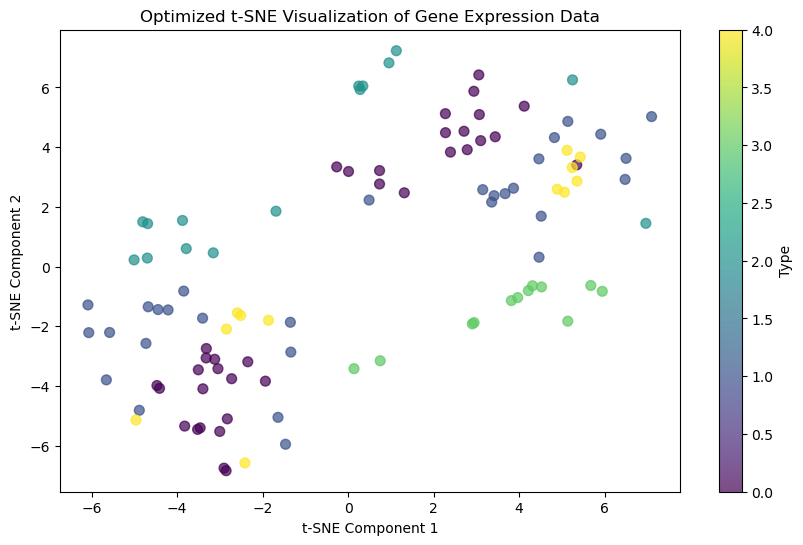

In [36]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(scatter, label='Type')
plt.title('Optimized t-SNE Visualization of Gene Expression Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## Summary

- After performing hyperparameter tuning on the Brain Cancer Gene Expression - CuMiDa dataset, the best parameters identified were a perplexity of 50 and a learning rate of 50, resulting in a silhouette score of 0.0887.
- Despite these optimizations, no significant changes were observed in the t-SNE visualizations, suggesting that further tuning or alternative approaches might be needed to enhance the clarity of the clusters.